#**Regression vs Classification**
![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Regression_vs_Classification.jpg)

# **Classification Algorithms**



#Import Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

### Models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score, classification_report

### Dimension reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings('ignore')

#Dataset

In [30]:
df  = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Shape of Dataset

In [31]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  284807
Number of columns:  31


#Information of Dataset

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [34]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Checking Null values in Dataset

In [35]:
# Checking null values in any column

df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [36]:
# Full rows having all ull values

df.isnull().all(0).sum()

0

In [37]:
# Full columns having all ull values

df.isnull().all(1).sum()

0

# Correlation of all columns

In [38]:
correltion_matrix = df.corr()
correltion_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


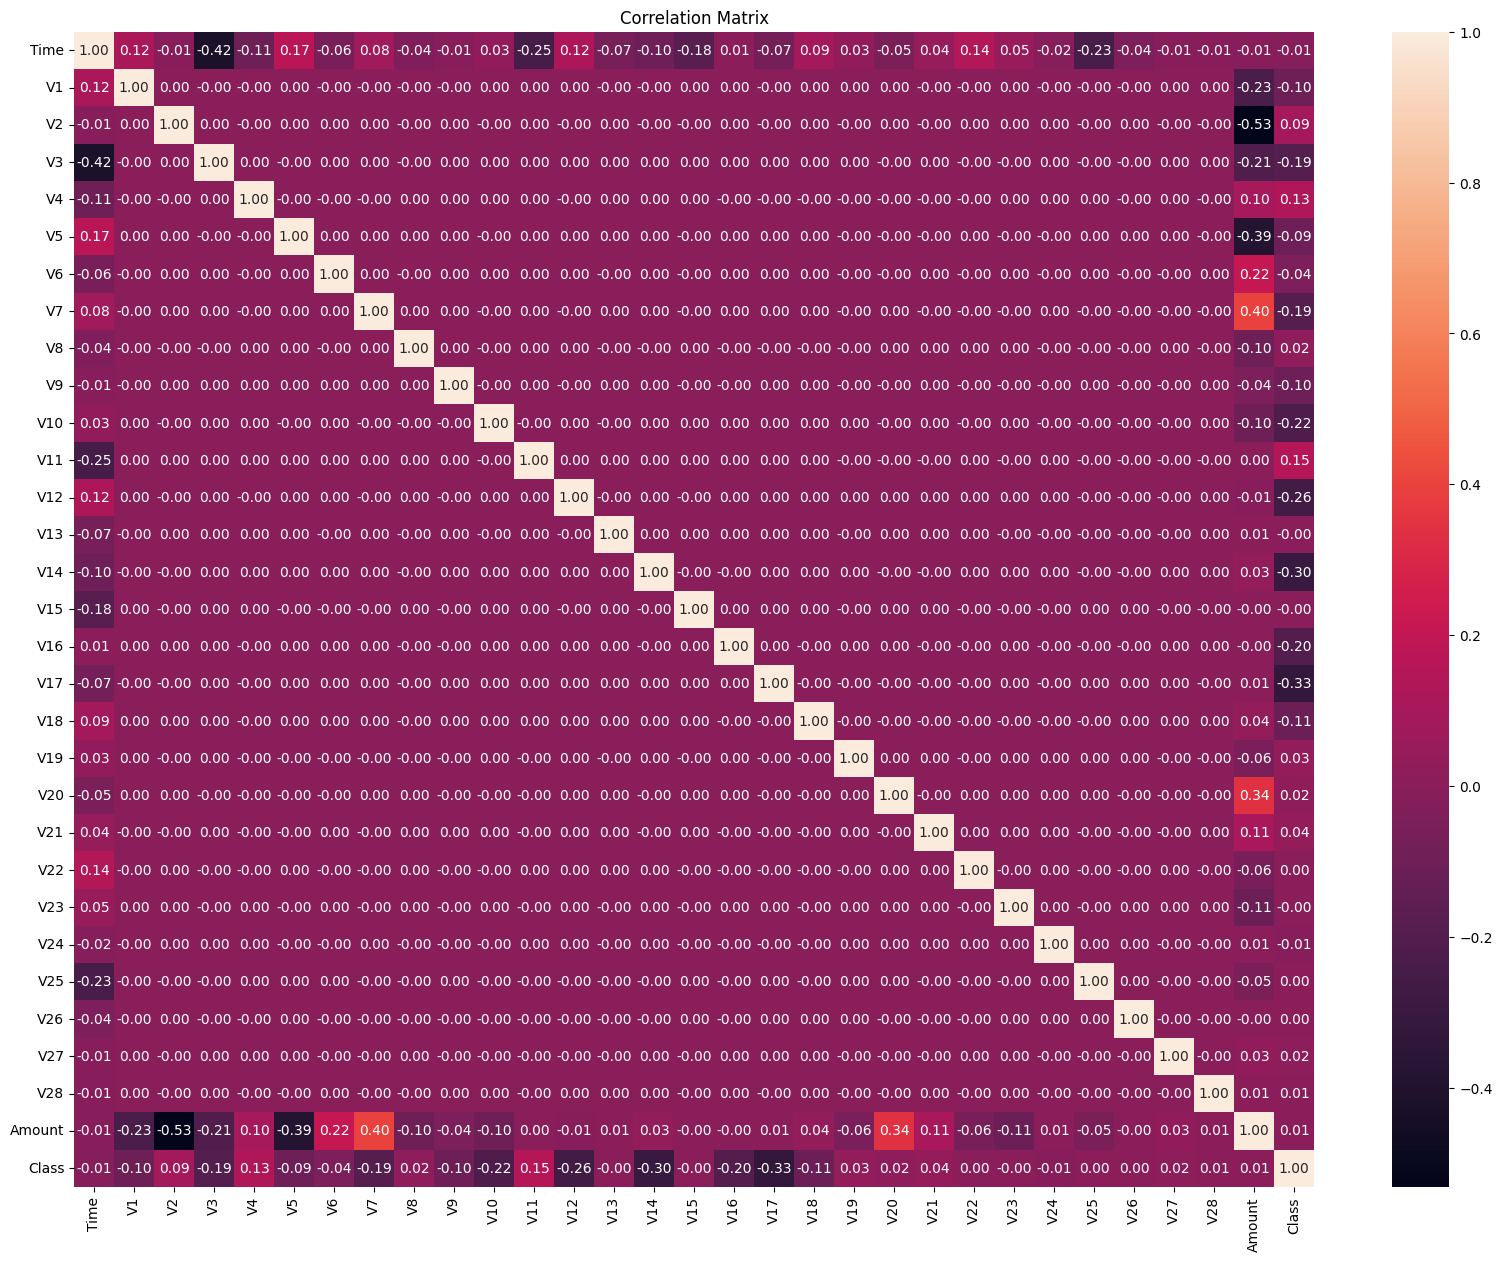

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(correltion_matrix, annot=True, fmt = '.2f', color = 'red')
plt.title('Correlation Matrix')
plt.show()

# Value count in Target column

In [40]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [41]:
df['Class'].value_counts(normalize = True) * 100

,proportion
Class,
0,99.827251
1,0.172749


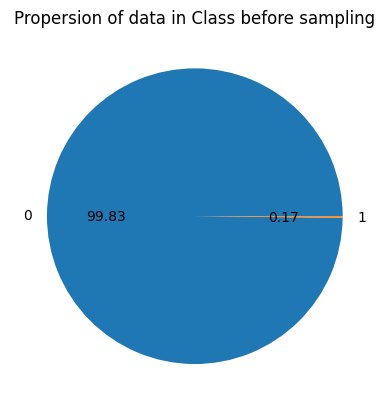

In [42]:
plt.pie(df['Class'].value_counts().values, autopct='%0.2f', labels=df['Class'].value_counts().index)
plt.title('Propersion of data in Class before sampling')
plt.show()

# Splitting dataset

In [15]:
# Split into X and Y
x = df.drop('Class', axis=1)
y = df['Class']

In [16]:
# Split into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=100)

In [17]:
y_train.value_counts(normalize=True) * 100

,proportion
Class,
0,99.827451
1,0.172549


In [18]:
y_test.value_counts(normalize=True) * 100

,proportion
Class,
0,99.826785
1,0.173215


# Sampling the dataset

#Over sampling

In [19]:
# Synthetic Minority Oversampling technique (SMOTE)

over_sampler = SMOTE(sampling_strategy=0.10)

resampled_xtrain, resampled_ytrain = over_sampler.fit_resample(x_train, y_train)

In [20]:
resampled_ytrain.value_counts(normalize=True) * 100

,proportion
Class,
0,90.909091
1,9.090909


#Under sampling

In [21]:
under_sampler = EditedNearestNeighbours(sampling_strategy='majority')

resampled_xtrain_1, resampled_ytrain_1 = under_sampler.fit_resample(resampled_xtrain, resampled_ytrain)

In [22]:
resampled_ytrain_1.value_counts(normalize=True) * 100

,proportion
Class,
0,90.611113
1,9.388887


In [24]:
# Assigning resampled_xtrain_1 and resampled_ytrain_1 train to x_train and y_train

x_train = resampled_xtrain_1
y_train = resampled_ytrain_1

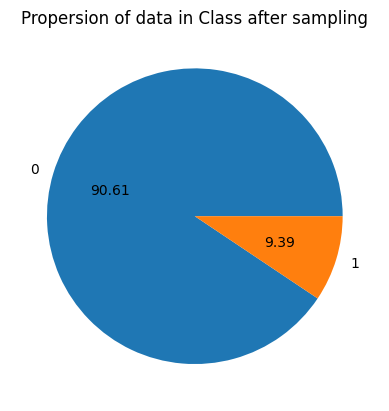

In [28]:
plt.pie(y_train.value_counts().values, autopct='%0.2f', labels=df['Class'].value_counts().index)
plt.title('Propersion of data in Class after sampling')
plt.show()

# Shape of dataset after sampling

In [23]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  284807
Number of columns:  31


#Scaling dataset

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Preparing models

In [ ]:
## Creating Model objects for training and comparision

log_reg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

#Preparing model dict

In [ ]:
model_dict = {'LogisticRegression': log_reg, 'SVC': svc, 'KNN': knn, 'DecisionTree': dt, 'RandomForest': rf,
              'AdaBoost': ada, 'GradientBoosting' : gbc, 'XGradientBoosting' : xgb}

#Fitting the models to get Classification report

In [ ]:
for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    print('--------------------Trained classification report--------------------------')
    y_pred_train = value.predict(x_train)
    print(classification_report(y_train, y_pred_train))

    print(f'-------------------Trained classification report--------------------------')
    y_pred_test = value.predict(x_test)
    print(classification_report(y_test, y_pred_test))


-------------------Training Started: LogisticRegression--------------------------
--------------------Trained classification report--------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    192191
           1       0.99      0.94      0.96     19902

    accuracy                           0.99    212093
   macro avg       0.99      0.97      0.98    212093
weighted avg       0.99      0.99      0.99    212093

-------------------Trained classification report--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.51      0.84      0.64       148

    accuracy                           1.00     85443
   macro avg       0.76      0.92      0.82     85443
weighted avg       1.00      1.00      1.00     85443

-------------------Training Started: SVC--------------------------
--------------------Trained classification rep

#Checking Scores

In [ ]:
# Precision Score

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained precision score: ', precision_score(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested precision score: ', precision_score(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained precision score:  0.9893865421354278
LogisticRegression tested precision score:  0.5122950819672131
-------------------Training Started: SVC--------------------------
SVC trained precision score:  0.9961287693561532
SVC tested precision score:  0.7300613496932515
-------------------Training Started: KNN--------------------------
KNN trained precision score:  0.9944039172579194
KNN tested precision score:  0.583732057416268
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained precision score:  1.0
DecisionTree tested precision score:  0.4199288256227758
-------------------Training Started: RandomForest--------------------------
RandomForest trained precision score:  1.0
RandomForest tested precision score:  0.8611111111111112
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained precision score:  0.981

In [ ]:
# Precision score of RandomForest and XGradientBoosting are considerable although the modelis overfitted in training set but the testing score is more than 85

In [ ]:
# Recall Score

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained recall score: ', recall_score(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested recall score: ', recall_score(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained recall score:  0.9367902723344388
LogisticRegression tested recall score:  0.8445945945945946
-------------------Training Started: SVC--------------------------
SVC trained recall score:  0.9826148125816501
SVC tested recall score:  0.8040540540540541
-------------------Training Started: KNN--------------------------
KNN trained recall score:  1.0
KNN tested recall score:  0.8243243243243243
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained recall score:  1.0
DecisionTree tested recall score:  0.8108108108108109
-------------------Training Started: RandomForest--------------------------
RandomForest trained recall score:  1.0
RandomForest tested recall score:  0.8378378378378378
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained recall score:  0.9478946839513617
AdaBoost tested recall score:  0.

In [ ]:
# Recall score of LogisticRegression, AdaBoost, GradientBoosting are considerable with comparing the difference between training score and testing score

In [ ]:
# F1 Score

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained F1 score: ', f1_score(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested F1 score: ', f1_score(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained F1 score:  0.962370309193207
LogisticRegression tested F1 score:  0.6377551020408163
-------------------Training Started: SVC--------------------------
SVC trained F1 score:  0.9893256437496838
SVC tested F1 score:  0.7652733118971061
-------------------Training Started: KNN--------------------------
KNN trained F1 score:  0.9971941076260147
KNN tested F1 score:  0.6834733893557423
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained F1 score:  1.0
DecisionTree tested F1 score:  0.5517241379310345
-------------------Training Started: RandomForest--------------------------
RandomForest trained F1 score:  1.0
RandomForest tested F1 score:  0.852233676975945
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained F1 score:  0.9643204007565301
AdaBoost tested F1 score:  0.546236559139785
-------------------

In [ ]:
# F1 score of SVC and RandomForest are fitting well as compared to the other models and their training and testing scores

In [ ]:
# Confusion matrix

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained recall score: ', confusion_matrix(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested recall score: ', confusion_matrix(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained recall score:  [[191807    195]
 [  1252  18650]]
LogisticRegression tested recall score:  [[85182   113]
 [   23   125]]
-------------------Training Started: SVC--------------------------
SVC trained recall score:  [[191923     79]
 [   396  19506]]
SVC tested recall score:  [[85248    47]
 [   29   119]]
-------------------Training Started: KNN--------------------------
KNN trained recall score:  [[191886    116]
 [     0  19902]]
KNN tested recall score:  [[85209    86]
 [   26   122]]
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained recall score:  [[192002      0]
 [     0  19902]]
DecisionTree tested recall score:  [[85131   164]
 [   28   120]]
-------------------Training Started: RandomForest--------------------------
RandomForest trained recall score:  [[192002      0]
 [     0  19902]]
RandomForest tested recall score:  [[

In [ ]:
# Accuracy Score

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained accuracy score: ', accuracy_score(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested accuracy score: ', accuracy_score(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained accuracy score:  0.992995473489944
LogisticRegression tested accuracy score:  0.9983263696265346
-------------------Training Started: SVC--------------------------
SVC trained accuracy score:  0.9979798265860486
SVC tested accuracy score:  0.9991105181231933
-------------------Training Started: KNN--------------------------
KNN trained accuracy score:  0.9994619164271251
KNN tested accuracy score:  0.9986423697669792
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained accuracy score:  1.0
DecisionTree tested accuracy score:  0.9980103694860901
-------------------Training Started: RandomForest--------------------------
RandomForest trained accuracy score:  1.0
RandomForest tested accuracy score:  0.9994616293903538
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained accuracy score:  0.99305211386603

In [ ]:
# Accuracy score of all models are overfitted

# Reduction of Dimensions

# Formula for no. of components in LDA -
**max components = min(n features , n classes −1)**

In [ ]:
# Number of compnents
components_range = min(x_train.shape[1], y.nunique() - 1)

print(components_range)

1


In [ ]:
# Fitting LDA and reducing dimensions

lda = LDA(n_components=components_range)
x_train_lda = lda.fit_transform(x_train, y_train)

x_test_lda = lda.transform(x_test)

print(lda.explained_variance_ratio_.sum())

1.0


#Score Check

In [ ]:
# Accuracy score

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train_lda, y_train)

    y_pred_train_lda = value.predict(x_train_lda)
    print(f'{key} trained accuracy score: ', accuracy_score(y_train, y_pred_train_lda))

    y_pred_test_lda = value.predict(x_test_lda)
    print(f'{key} tested accuracy score: ', accuracy_score(y_test, y_pred_test_lda))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained accuracy score:  0.9853537427488519
LogisticRegression tested accuracy score:  0.9941364418384186
-------------------Training Started: SVC--------------------------
SVC trained accuracy score:  0.9868452726526105
SVC tested accuracy score:  0.9975773322565921
-------------------Training Started: KNN--------------------------
KNN trained accuracy score:  0.9885680840920784
KNN tested accuracy score:  0.9948503680816451
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained accuracy score:  0.9999480796552489
DecisionTree tested accuracy score:  0.9886356986529031
-------------------Training Started: RandomForest--------------------------
RandomForest trained accuracy score:  0.9999197594672029
RandomForest tested accuracy score:  0.9886239949439978
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained ac

In [ ]:
# After dimension reduction still all models have overfitted accuracy score

In [ ]:
# Precision Score

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train_lda, y_train)

    y_pred_train_lda = value.predict(x_train_lda)
    print(f'{key} trained precision score: ', precision_score(y_train, y_pred_train_lda))

    y_pred_test_lda = value.predict(x_test_lda)
    print(f'{key} tested precision score: ', precision_score(y_test, y_pred_test_lda))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained precision score:  0.9454314047833696
LogisticRegression tested precision score:  0.20632279534109818
-------------------Training Started: SVC--------------------------
SVC trained precision score:  0.9792238337906704
SVC tested precision score:  0.40327868852459015
-------------------Training Started: KNN--------------------------
KNN trained precision score:  0.968130690948045
KNN tested precision score:  0.22862453531598512
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained precision score:  1.0
DecisionTree tested precision score:  0.1136150234741784
-------------------Training Started: RandomForest--------------------------
RandomForest trained precision score:  0.9999497209512797
RandomForest tested precision score:  0.1137218045112782
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained preci

In [ ]:
# Precision scores of all trained models are much more than tested model

In [ ]:
# Recall Score

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train_lda, y_train)

    y_pred_train_lda = value.predict(x_train_lda)
    print(f'{key} trained recall score: ', recall_score(y_train, y_pred_train_lda))

    y_pred_test_lda = value.predict(x_test_lda)
    print(f'{key} tested recall score: ', recall_score(y_test, y_pred_test_lda))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained recall score:  0.8957893679027233
LogisticRegression tested recall score:  0.8378378378378378
-------------------Training Started: SVC--------------------------
SVC trained recall score:  0.8786051653100191
SVC tested recall score:  0.831081081081081
-------------------Training Started: KNN--------------------------
KNN trained recall score:  0.9082001808863431
KNN tested recall score:  0.831081081081081
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained recall score:  0.9994472917294744
DecisionTree tested recall score:  0.8175675675675675
-------------------Training Started: RandomForest--------------------------
RandomForest trained recall score:  0.9993467993166516
RandomForest tested recall score:  0.8175675675675675
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained recall score:  0.8815194

In [ ]:
# Recall score of all models performing well after dimension reduction but the score of trained model is more than tested model

In [ ]:
# F1 Score

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train_lda, y_train)

    y_pred_train_lda = value.predict(x_train_lda)
    print(f'{key} trained F1 score: ', f1_score(y_train, y_pred_train_lda))

    y_pred_test_lda = value.predict(x_test_lda)
    print(f'{key} tested F1 score: ', f1_score(y_test, y_pred_test_lda))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained F1 score:  0.9199411749529142
LogisticRegression tested F1 score:  0.3311081441922563
-------------------Training Started: SVC--------------------------
SVC trained F1 score:  0.9261897825683942
SVC tested F1 score:  0.543046357615894
-------------------Training Started: KNN--------------------------
KNN trained F1 score:  0.9372083376542569
KNN tested F1 score:  0.358600583090379
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained F1 score:  0.9997235694720177
DecisionTree tested F1 score:  0.19950535861500412
-------------------Training Started: RandomForest--------------------------
RandomForest trained F1 score:  0.9995727677112914
RandomForest tested F1 score:  0.19950535861500412
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained F1 score:  0.9265870920038027
AdaBoost tested F1 score:  0.514

In [ ]:
# F1 score of all trained models are much more than tested model

In [ ]:
# Confusion matrix

for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train_lda, y_train)

    y_pred_train_lda = value.predict(x_train_lda)
    print(f'{key} trained recall score: ', confusion_matrix(y_train, y_pred_train_lda))

    y_pred_test_lda = value.predict(x_test_lda)
    print(f'{key} tested recall score: ', confusion_matrix(y_test, y_pred_test_lda))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained recall score:  [[190932   1029]
 [  2074  17828]]
LogisticRegression tested recall score:  [[84818   477]
 [   24   124]]
-------------------Training Started: SVC--------------------------
SVC trained recall score:  [[191590    371]
 [  2416  17486]]
SVC tested recall score:  [[85113   182]
 [   25   123]]
-------------------Training Started: KNN--------------------------
KNN trained recall score:  [[191366    595]
 [  1827  18075]]
KNN tested recall score:  [[84880   415]
 [   25   123]]
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained recall score:  [[191961      0]
 [    11  19891]]
DecisionTree tested recall score:  [[84351   944]
 [   27   121]]
-------------------Training Started: RandomForest--------------------------
RandomForest trained recall score:  [[191958      3]
 [    15  19887]]
RandomForest tested recall score:  [[